# 1

# (a).

(a) Read all files as a tibble object. Identify primary keys in all datasets and write R
code to show that these keys uniquely identifies observations in these datasets.

In [1]:
install.packages(c('tidyverse','nycflights13','ggplot2','gridExtra','grid','reshape','stringr'))
library(tidyverse)
library(nycflights13)
library(ggplot2)
library(gridExtra)
library(grid)
library(reshape)
library(stringr)

count = as_tibble(read_csv("count.csv"))
mrna = as_tibble(read_csv("mRNA.csv"))
run_info = as_tibble(read_csv("Run_Info.csv"))
treatment_info = as_tibble(read_csv("Treatment_Info.csv"))

Installing packages into 'C:/Users/DELL/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'grid' is not available (for R version 3.6.1)"Warning message:
"package 'grid' is a base package, and should not be updated"

package 'tidyverse' successfully unpacked and MD5 sums checked
package 'nycflights13' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'reshape' successfully unpacked and MD5 sums checked
package 'stringr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\DELL\AppData\Local\Temp\RtmpY9YmYm\downloaded_packages


Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

In [2]:
#show that these keys uniquely identifies observations in these datasets:
count %>% count(ensgene) %>% filter(n > 1)
mrna %>% count(x) %>% filter(n > 1)
run_info %>% count(Run) %>% filter(n > 1)
treatment_info %>% count(Sample) %>% filter(n > 1)

ensgene,n


x,n


Run,n


Sample,n


# (b).

Both Run Info.csv and Treatment Info.csv contains meta-data information.
Using appropriate join function, combine the information into one tibble called
metadata.

In [3]:
colnames(treatment_info)[1] = 'sample'
metadata = as_tibble(full_join(run_info, treatment_info, by = 'sample'))
metadata

Run,avgLength,Experiment,BioSample,sample,Treatment,Cell_type
SRR1039508,126,SRX384345,SAMN02422669,GSM1275862,Untreated,N61311
SRR1039509,126,SRX384346,SAMN02422675,GSM1275863,Dexamethasone,N61311
SRR1039510,126,SRX384347,SAMN02422668,GSM1275864,Albuterol,N61311
SRR1039511,126,SRX384348,SAMN02422667,GSM1275865,Albuterol_Dexamethasone,N61311
SRR1039512,126,SRX384349,SAMN02422678,GSM1275866,Untreated,N052611
SRR1039513,87,SRX384350,SAMN02422670,GSM1275867,Dexamethasone,N052611
SRR1039514,126,SRX384351,SAMN02422681,GSM1275868,Albuterol,N052611
SRR1039515,114,SRX384352,SAMN02422671,GSM1275869,Albuterol_Dexamethasone,N052611
SRR1039516,120,SRX384353,SAMN02422682,GSM1275870,Untreated,N080611
SRR1039517,126,SRX384354,SAMN02422673,GSM1275871,Dexamethasone,N080611


# (c).

Write a pipe that computes the mean of the average length by treatment type and by
cell type. Create a 1*2 grid using ggplot2 and plot the average length by treatment
type or average length by treatment type. Make sure you use an appropriate legend for
the plots so that each point in the plot can be visually identified and add an appropriate
title for the grid.

In [22]:
metadata %>% 
    group_by(Treatment) %>%
    summarise(mean = mean(avgLength, na.rm = TRUE))

Treatment,mean
Albuterol,125.75
Albuterol_Dexamethasone,118.25
Dexamethasone,109.25
Untreated,118.25


In [5]:
metadata %>% 
    group_by(Cell_type) %>%
    summarise(mean = mean(avgLength, na.rm = TRUE))

Cell_type,mean
N052611,113.25
N061011,112.50
N080611,119.75
N61311,126.00


<b> Plot the average length by treatment type or average length by cell type

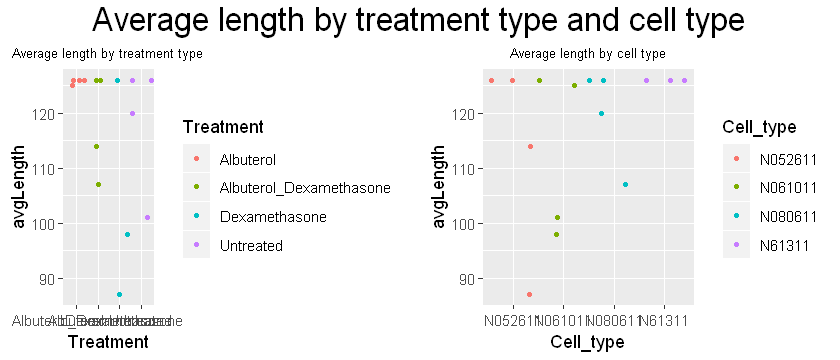

In [6]:
options(repr.plot.width=7,repr.plot.height=3)
theme_update(plot.title = element_text(hjust = 0.5,size=8))
p1 = ggplot(data = metadata, aes(x = Treatment , y = avgLength))+geom_jitter(width = .5,height = 0,size = 1,aes(colour = Treatment))+ggtitle('Average length by treatment type')
p2 = ggplot(data = metadata, aes(x = Cell_type , y = avgLength))+geom_jitter(width = .5,height = 0,size = 1,aes(colour = Cell_type))+ggtitle('Average length by cell type')
grid.arrange(p1, p2, nrow = 1, top = textGrob('Average length by treatment type and cell type',gp=gpar(fontsize=20,font=1)))

# (d).

In [23]:
mnc <- count %>%
    pivot_longer(
    cols = -ensgene,
    names_to = 'Run'
    ) %>%
left_join(metadata, by = 'Run')
dim(mnc)
mnc[1:10,]

[1] 309552      9

ensgene,Run,value,avgLength,Experiment,BioSample,sample,Treatment,Cell_type
ENSG00000000003,SRR1039508,723,126,SRX384345,SAMN02422669,GSM1275862,Untreated,N61311
ENSG00000000003,SRR1039509,486,126,SRX384346,SAMN02422675,GSM1275863,Dexamethasone,N61311
ENSG00000000003,SRR1039512,904,126,SRX384349,SAMN02422678,GSM1275866,Untreated,N052611
ENSG00000000003,SRR1039513,445,87,SRX384350,SAMN02422670,GSM1275867,Dexamethasone,N052611
ENSG00000000003,SRR1039516,1170,120,SRX384353,SAMN02422682,GSM1275870,Untreated,N080611
ENSG00000000003,SRR1039517,1097,126,SRX384354,SAMN02422673,GSM1275871,Dexamethasone,N080611
ENSG00000000003,SRR1039520,806,101,SRX384357,SAMN02422683,GSM1275874,Untreated,N061011
ENSG00000000003,SRR1039521,604,98,SRX384358,SAMN02422677,GSM1275875,Dexamethasone,N061011
ENSG00000000005,SRR1039508,0,126,SRX384345,SAMN02422669,GSM1275862,Untreated,N61311
ENSG00000000005,SRR1039509,0,126,SRX384346,SAMN02422675,GSM1275863,Dexamethasone,N61311


# (e).

Using a side-by-side box plot, visually inspect if there is a difference in mean (or median)
expression between different treatments? Make sure you add a legend. If working
with counts directly is not informative, use an appropriate transformation. What do you
conclude? You may add your conclusion as a comment in your .R file.

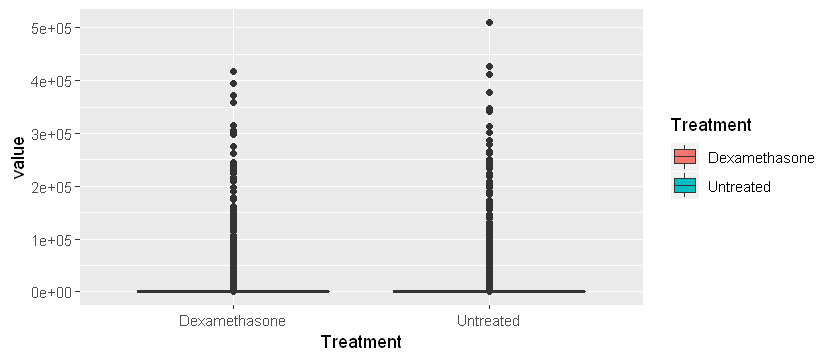

In [8]:
bp1 = ggplot(data = mnc)
bp1 + geom_boxplot(aes(y = value, x = Treatment, fill = Treatment))

Working with counts directly is not informative, try log transformation

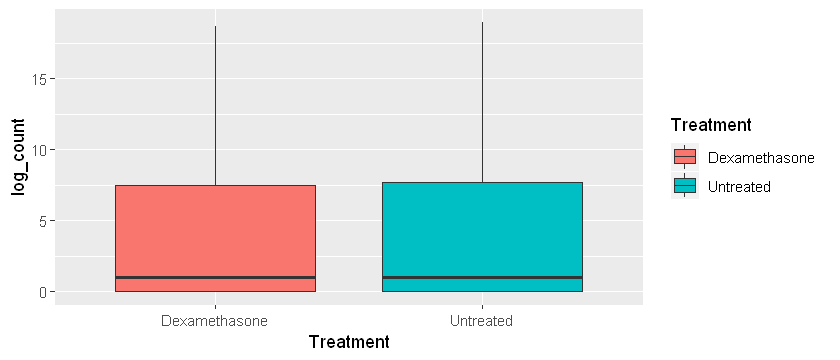

In [9]:
ndf<-data.frame(mnc,log_count=log2(mnc$value+1))
bp1_l = ggplot(data = ndf)
bp1_l + geom_boxplot(aes(y = log_count, x = Treatment, fill = Treatment))

**Conclusion**: there is no difference between different treatment

# (f).

Using a side-by-side box plot, visually inspect if there is a difference in mean (or median)
expression between different cell types? Make sure you add a legend. If working
with counts directly is not informative, use an appropriate transformation. What do you
conclude? You may add your conclusion as a comment in your .R file.

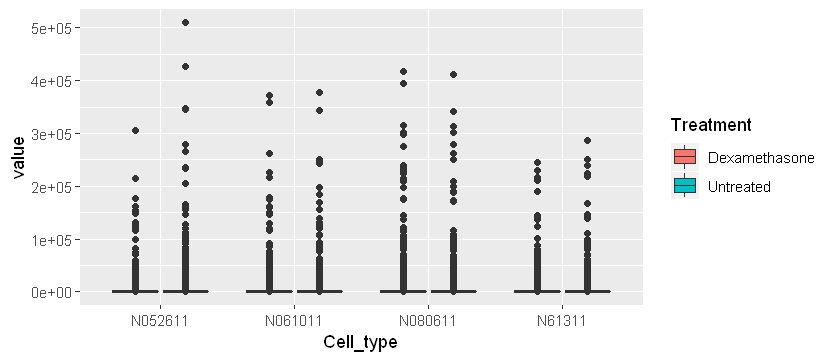

In [10]:
bp2 = ggplot(data = mnc)
bp2 + geom_boxplot(aes(y = value, x = Cell_type, fill = Treatment))

Working with counts directly is not informative, try log transformation

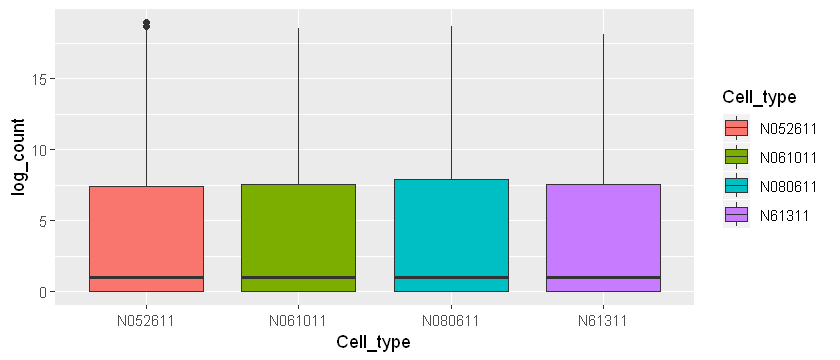

In [11]:
bp2_l = ggplot(data = ndf)
bp2_l + geom_boxplot(aes(y = log_count, x = Cell_type, fill = Cell_type))

**Conclusion**: there is no difference between different cell type

# (g).

Using a side-by-side box plot, visually inspect if there is a difference in mean (or median)
expression between different treatment types within cell types? Make sure you
add a legend. If working with counts directly is not informative, use an appropriate
transformation. What do you conclude? You may add your conclusion as a comment
in your .R file.

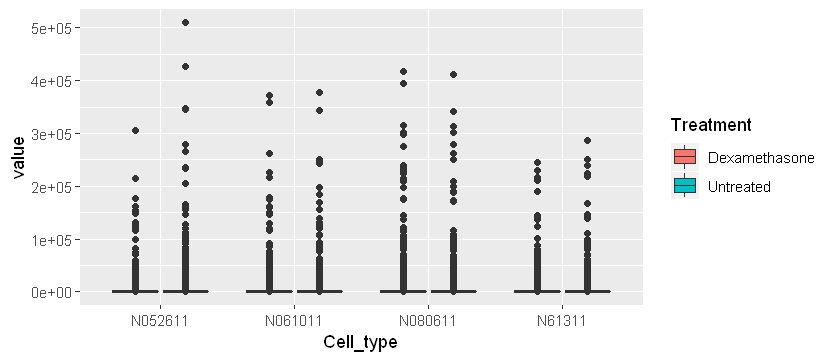

In [12]:
bp3 = ggplot(data = mnc)
bp3 + geom_boxplot(aes(y = value, x = Cell_type, fill = Treatment))

Working with counts directly is not informative, try log transformation

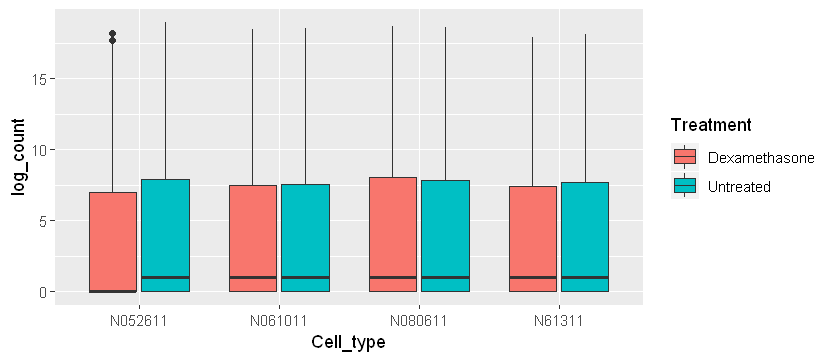

In [13]:
bp3_l = ggplot(data = ndf)
bp3_l + geom_boxplot(aes(y = log_count, x = Cell_type, fill = Treatment))

**Conclusion:** Within cell type **N052611**, there is difference between two treatment.

# (h).

Extract the expression profile of gene ”ENSG00000064607” and plot it against the
samples in x-axis. Add different symbols and/or colors to identify which expressions
are from which treatment type.

,ensgene,Run,value,avgLength,Experiment,BioSample,sample,Treatment,Cell_type,log_count
7113,ENSG00000064607,SRR1039508,1732,126,SRX384345,SAMN02422669,GSM1275862,Untreated,N61311,10.759056
7114,ENSG00000064607,SRR1039509,1587,126,SRX384346,SAMN02422675,GSM1275863,Dexamethasone,N61311,10.632995
7115,ENSG00000064607,SRR1039512,2052,126,SRX384349,SAMN02422678,GSM1275866,Untreated,N052611,11.003518
7116,ENSG00000064607,SRR1039513,1012,87,SRX384350,SAMN02422670,GSM1275867,Dexamethasone,N052611,9.984418
7117,ENSG00000064607,SRR1039516,1810,120,SRX384353,SAMN02422682,GSM1275870,Untreated,N080611,10.822571
7118,ENSG00000064607,SRR1039517,2071,126,SRX384354,SAMN02422673,GSM1275871,Dexamethasone,N080611,11.016808
7119,ENSG00000064607,SRR1039520,1405,101,SRX384357,SAMN02422683,GSM1275874,Untreated,N061011,10.457381
7120,ENSG00000064607,SRR1039521,1260,98,SRX384358,SAMN02422677,GSM1275875,Dexamethasone,N061011,10.300353


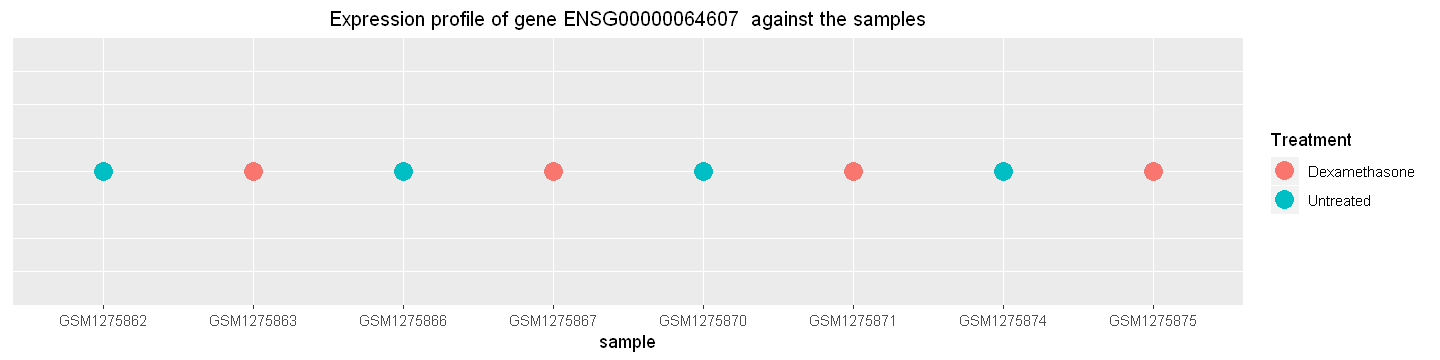

In [14]:
ext_gene = ndf[which(ndf$ensgene=='ENSG00000064607'),]
ext_gene
options(repr.plot.width=12,repr.plot.height=3)
theme_update(plot.title = element_text(hjust = 0.5,size=12))
ggplot(data = ext_gene,aes(x = sample, y = 0, col = Treatment))+geom_jitter(size = 5,width = 0, height = 0)+ggtitle('Expression profile of gene ENSG00000064607  against the samples')+theme(axis.title.y=element_blank(),axis.text.y=element_blank(),axis.ticks.y=element_blank())

# 2

# (a).

Write R code that will give you the position of the start codon that codes for “Met”
(Methionine).

In [15]:
mRNA_first<-read.csv("mRNA.csv")
(mRNA<-toString(mRNA_first[[1]]))
str_locate_all(mRNA,"AUG")

[1] "AGCCCUCCAGGACAGGCUGCAUCAGAAGAGGCCAUCAAGCAGAUCACUGUCCUUCUGCCAUGGCCCUGUGGAUGCGCCUCCUGCCCCUGCUGGCGCUGCUGGCCCUCUGGGGACCUGACCCAGCCGCAGCCUUUGUGAACCAACACCUGUGCGGCUCACACCUGGUGGAAGCUCUCUACCUAGUGUGCGGGGAACGAGGCUUCUUCUACACACCCAAGACCCGCCGGGAGGCAGAGGACCUGCAGGUGGGGCAGGUGGAGCUGGGCGGGGGCCCUGGUGCAGGCAGCCUGCAGCCCUUGGCCCUGGAGGGGUCCCUGCAGAAGCGUGGCAUUGUGGAACAAUGCUGUACCAGCAUCUGCUCCCUCUACCAGCUGGAGAACUACUGCAACUAGACGCAGCCCGCAGGCAGCCCCCCACCCGCCGCCUCCUGCACCGAGAGAGAUGGAAUAAAGCCCUUGAACCAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"

start,end
60,62
72,74
341,343
442,444


# (b).

Write R code that will give you the position of the all possible stop codons.

In [16]:
str_locate_all(mRNA,c('UGA','UAA','UAG'))

start,end
116,118
136,138
457,459
start,end
448,450
start,end
181,183
390,392


# (c).

Write R code that extracts the sequence such that it starts with the start codon.

In [17]:
# first
sf = substr(mRNA,(str_locate_all(mRNA,"AUG")[[1]][1]),(str_locate_all(mRNA,"AUG")[[1]][2])-1)
print(c(nchar(sf),sf))
#between
for (i in 2:(length(str_locate_all(mRNA,"AUG")[[1]])/2-1)){
    s = substr(mRNA,(str_locate_all(mRNA,"AUG")[[1]][i]),(str_locate_all(mRNA,"AUG")[[1]][i+1]))
    print(c(nchar(s),s))
}
#last
sl = substr(mRNA,(str_locate_all(mRNA,"AUG")[[1]][(length(str_locate_all(mRNA,"AUG")[[1]])/2)]),length(str_split(mRNA,'')[[1]]))
print(c(nchar(sl),sl))

[1] "12"           "AUGGCCCUGUGG"
[1] "270"                                                                                                                                                                                                                                                                           
[2] "AUGCGCCUCCUGCCCCUGCUGGCGCUGCUGGCCCUCUGGGGACCUGACCCAGCCGCAGCCUUUGUGAACCAACACCUGUGCGGCUCACACCUGGUGGAAGCUCUCUACCUAGUGUGCGGGGAACGAGGCUUCUUCUACACACCCAAGACCCGCCGGGAGGCAGAGGACCUGCAGGUGGGGCAGGUGGAGCUGGGCGGGGGCCCUGGUGCAGGCAGCCUGCAGCCCUUGGCCCUGGAGGGGUCCCUGCAGAAGCGUGGCAUUGUGGAACAA"
[1] "102"                                                                                                   
[2] "AUGCUGUACCAGCAUCUGCUCCCUCUACCAGCUGGAGAACUACUGCAACUAGACGCAGCCCGCAGGCAGCCCCCCACCCGCCGCCUCCUGCACCGAGAGAGA"
[1] "54"                                                    
[2] "AUGGAAUAAAGCCCUUGAACCAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"


# (d).

Write a function called genetic code that takes one codon as an input and returns
the resulting amino acid.

In [18]:
genetic_code = function(x){
    s0 = ''
    for (i in 1:(nchar(x)/3)){
        if ((substr(x,3*i-2,3*i)=='UUU')|(substr(x,3*i-2,3*i)=='UUC')){
            s0 = str_c(s0,'-Phe')
        }
        if ((substr(x,3*i-2,3*i)=='UUA')|(substr(x,3*i-2,3*i)=='UUG')|(substr(x,3*i-2,3*i)=='CUU')|(substr(x,3*i-2,3*i)=='CUC')|(substr(x,3*i-2,3*i)=='CUA')|(substr(x,3*i-2,3*i)=='CUG')){
            s0 = str_c(s0,'-Leu')
        }
        if ((substr(x,3*i-2,3*i)=='UCU')|(substr(x,3*i-2,3*i)=='UCC')|(substr(x,3*i-2,3*i)=='UCA')|(substr(x,3*i-2,3*i)=='UCG')|(substr(x,3*i-2,3*i)=='AGU')|(substr(x,3*i-2,3*i)=='AGC')){
            s0 = str_c(s0,'-Ser')
        }
        if ((substr(x,3*i-2,3*i)=='UAU')|(substr(x,3*i-2,3*i)=='UAC')){
            s0 = str_c(s0,'-Tyr')
        }
        if ((substr(x,3*i-2,3*i)=='UGU')|(substr(x,3*i-2,3*i)=='UGC')){
            s0 = str_c(s0,'-Cys')
        }
        if ((substr(x,3*i-2,3*i)=='CCU')|(substr(x,3*i-2,3*i)=='CCC')|(substr(x,3*i-2,3*i)=='CCA')|(substr(x,3*i-2,3*i)=='CCG')){
            s0 = str_c(s0,'-Pro')
        }
        if ((substr(x,3*i-2,3*i)=='CAU')|(substr(x,3*i-2,3*i)=='CAC')){
            s0 = str_c(s0,'-His')
        }
        if ((substr(x,3*i-2,3*i)=='UGG')){
            s0 = str_c(s0,'-Trp')
        }
        if ((substr(x,3*i-2,3*i)=='CAA')|(substr(x,3*i-2,3*i)=='CAG')){
            s0 = str_c(s0,'-Gln')
        }
        if ((substr(x,3*i-2,3*i)=='CGU')|(substr(x,3*i-2,3*i)=='CGC')|(substr(x,3*i-2,3*i)=='CGA')|(substr(x,3*i-2,3*i)=='CGG')|(substr(x,3*i-2,3*i)=='AGA')|(substr(x,3*i-2,3*i)=='AGG')){
            s0 = str_c(s0,'-Arg')
        }
        if ((substr(x,3*i-2,3*i)=='AUU')|(substr(x,3*i-2,3*i)=='AUC')|(substr(x,3*i-2,3*i)=='AUA')){
            s0 = str_c(s0,'-Ile')
        }
        if ((substr(x,3*i-2,3*i)=='AUG')){
            s0 = str_c(s0,'-Met')
        }
        if ((substr(x,3*i-2,3*i)=='ACU')|(substr(x,3*i-2,3*i)=='ACC')|(substr(x,3*i-2,3*i)=='ACA')|(substr(x,3*i-2,3*i)=='ACG')){
            s0 = str_c(s0,'-Thr')
        }
        if ((substr(x,3*i-2,3*i)=='AAU')|(substr(x,3*i-2,3*i)=='AAC')){
            s0 = str_c(s0,'-Asn')
        }
        if ((substr(x,3*i-2,3*i)=='AAA')|(substr(x,3*i-2,3*i)=='AAG')){
            s0 = str_c(s0,'-Lys')
        }
        if ((substr(x,3*i-2,3*i)=='GUU')|(substr(x,3*i-2,3*i)=='GUC')|(substr(x,3*i-2,3*i)=='GUA')|(substr(x,3*i-2,3*i)=='GUG')){
            s0 = str_c(s0,'-Val')
        }
        if ((substr(x,3*i-2,3*i)=='GCU')|(substr(x,3*i-2,3*i)=='GCC')|(substr(x,3*i-2,3*i)=='GCA')|(substr(x,3*i-2,3*i)=='GCG')){
            s0 = str_c(s0,'-Ala')
        }
        if ((substr(x,3*i-2,3*i)=='GGU')|(substr(x,3*i-2,3*i)=='GGC')|(substr(x,3*i-2,3*i)=='GGA')|(substr(x,3*i-2,3*i)=='GGG')){
            s0 = str_c(s0,'-Gly')
        }
        if ((substr(x,3*i-2,3*i)=='GAU')|(substr(x,3*i-2,3*i)=='GAC')){
            s0 = str_c(s0,'-Asp')
        }
        if ((substr(x,3*i-2,3*i)=='GAA')|(substr(x,3*i-2,3*i)=='GAC')){
            s0 = str_c(s0,'-Glu')
        }
        if ((substr(x,3*i-2,3*i)=='UAA')|(substr(x,3*i-2,3*i)=='UAG')|(substr(x,3*i-2,3*i)=='UGA')){
            break
        }
    }
    return(substring(s0,2))
}

# (e).

Use this genetic code function, translate your mRNA sequence to a protein sequence
such that the amino acids are joined by the character “-”. Your resulting protein sequence
should look something like this:
“Met-Ala-: : :”

In [19]:
cat(genetic_code(sf),sep="\n")
for (i in 2:(length(str_locate_all(mRNA,"AUG")[[1]])/2-1)){
    s = substr(mRNA,(str_locate_all(mRNA,"AUG")[[1]][i]),(str_locate_all(mRNA,"AUG")[[1]][i+1]))
    cat(genetic_code(s),sep="\n")
}
cat(genetic_code(sl),sep="\n")

Met-Ala-Leu-Trp
Met-Arg-Leu-Leu-Pro-Leu-Leu-Ala-Leu-Leu-Ala-Leu-Trp-Gly-Pro-Asp-Glu-Pro-Ala-Ala-Ala-Phe-Val-Asn-Gln-His-Leu-Cys-Gly-Ser-His-Leu-Val-Glu-Ala-Leu-Tyr-Leu-Val-Cys-Gly-Glu-Arg-Gly-Phe-Phe-Tyr-Thr-Pro-Lys-Thr-Arg-Arg-Ala-Asp-Glu-Leu-Gln-Val-Gly-Gln-Val-Leu-Gly-Gly-Gly-Pro-Gly-Ala-Gly-Ser-Leu-Gln-Pro-Leu-Ala-Leu-Gly-Ser-Leu-Gln-Lys-Arg-Gly-Ile-Val-Glu-Gln
Met-Leu-Tyr-Gln-His-Leu-Leu-Pro-Leu-Pro-Ala-Gly-Glu-Leu-Leu-Gln-Leu-Asp-Glu-Ala-Ala-Arg-Arg-Gln-Pro-Pro-Thr-Arg-Arg-Leu-Leu-His-Arg-Arg
Met-Glu


# (f).

Write R code that prints the length of the resulting protein. Note: stop codon should
not code for any amino acid.

In [20]:
c = (nchar(genetic_code(sf))+1)/4
print(str_c("First one has ", c))
print("For Second to the one before last one")
for (i in 2:(length(str_locate_all(mRNA,"AUG")[[1]])/2-1)){
    s = substr(mRNA,(str_locate_all(mRNA,"AUG")[[1]][i]),(str_locate_all(mRNA,"AUG")[[1]][i+1]))
    c = (nchar(genetic_code(s))+1)/4
    print(str_c(i,": ",c))
}
c = (nchar(genetic_code(sl))+1)/4
print(str_c("Last one has ", c))

[1] "First one has 4"
[1] "For Second to the one before last one"
[1] "2: 88"
[1] "3: 34"
[1] "Last one has 2"
